In [19]:
import polars as pl
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker
from zoneinfo import ZoneInfo
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
%config InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'

In [5]:
df = pl.read_parquet("./data/data_log.parquet")

timestamp,temperature,pressure,humidity
str,f64,f64,f64
"""2025-05-03 14:35:52""",13.32,985.147339,53.930664
"""2025-05-03 14:35:55""",13.3,985.078735,57.208984
"""2025-05-03 14:35:58""",13.39,985.087952,57.338867
"""2025-05-03 14:36:01""",13.38,985.081665,57.023438
"""2025-05-03 14:36:04""",13.42,985.080322,57.061523
…,…,…,…
"""2025-05-04 00:27:19""",13.16,989.57782,53.347656
"""2025-05-04 00:27:22""",13.16,989.579346,53.347656
"""2025-05-04 00:27:25""",13.16,989.567017,53.379883


In [27]:
timestamps = [
    datetime.strptime(ts, "%Y-%m-%d %H:%M:%S")
    .replace(tzinfo=ZoneInfo("UTC"))
    .astimezone(ZoneInfo("America/Chicago"))
    for ts in df["timestamp"]
]

[datetime.datetime(2025, 5, 3, 9, 35, 52, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 35, 55, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 35, 58, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 1, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 4, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 7, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 10, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 13, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 16, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 19, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 22, tzinfo=zoneinfo.ZoneInfo(key='America/Chi

In [36]:
timestamps_naive = [ts.replace(tzinfo=None) for ts in timestamps]

[datetime.datetime(2025, 5, 3, 9, 35, 52),
 datetime.datetime(2025, 5, 3, 9, 35, 55),
 datetime.datetime(2025, 5, 3, 9, 35, 58),
 datetime.datetime(2025, 5, 3, 9, 36, 1),
 datetime.datetime(2025, 5, 3, 9, 36, 4),
 datetime.datetime(2025, 5, 3, 9, 36, 7),
 datetime.datetime(2025, 5, 3, 9, 36, 10),
 datetime.datetime(2025, 5, 3, 9, 36, 13),
 datetime.datetime(2025, 5, 3, 9, 36, 16),
 datetime.datetime(2025, 5, 3, 9, 36, 19),
 datetime.datetime(2025, 5, 3, 9, 36, 22),
 datetime.datetime(2025, 5, 3, 9, 36, 25),
 datetime.datetime(2025, 5, 3, 9, 36, 28),
 datetime.datetime(2025, 5, 3, 9, 36, 31),
 datetime.datetime(2025, 5, 3, 9, 36, 34),
 datetime.datetime(2025, 5, 3, 9, 36, 37),
 datetime.datetime(2025, 5, 3, 9, 36, 40),
 datetime.datetime(2025, 5, 3, 9, 36, 43),
 datetime.datetime(2025, 5, 3, 9, 36, 46),
 datetime.datetime(2025, 5, 3, 9, 36, 49),
 datetime.datetime(2025, 5, 3, 9, 36, 52),
 datetime.datetime(2025, 5, 3, 9, 36, 55),
 datetime.datetime(2025, 5, 3, 9, 36, 58),
 datetime.date

In [37]:
timestamps[:5]

[datetime.datetime(2025, 5, 3, 9, 35, 52, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 35, 55, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 35, 58, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 1, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago')),
 datetime.datetime(2025, 5, 3, 9, 36, 4, tzinfo=zoneinfo.ZoneInfo(key='America/Chicago'))]

In [38]:
timestamps_naive[:5]

[datetime.datetime(2025, 5, 3, 9, 35, 52),
 datetime.datetime(2025, 5, 3, 9, 35, 55),
 datetime.datetime(2025, 5, 3, 9, 35, 58),
 datetime.datetime(2025, 5, 3, 9, 36, 1),
 datetime.datetime(2025, 5, 3, 9, 36, 4)]

In [17]:
temperature = df["temperature"].to_list()
pressure = df["pressure"].to_list()
humidity = df["humidity"].to_list()

[53.9306640625,
 57.208984375,
 57.3388671875,
 57.0234375,
 57.0615234375,
 56.763671875,
 56.7861328125,
 56.8056640625,
 56.7626953125,
 56.935546875,
 57.4072265625,
 57.65234375,
 57.3388671875,
 57.02734375,
 57.8984375,
 58.1083984375,
 57.3740234375,
 57.15234375,
 57.2109375,
 57.033203125,
 56.9404296875,
 56.7841796875,
 56.7998046875,
 56.6298828125,
 56.30859375,
 56.009765625,
 56.08984375,
 56.1376953125,
 55.443359375,
 55.189453125,
 55.1142578125,
 55.078125,
 55.0400390625,
 55.0341796875,
 54.865234375,
 54.669921875,
 54.763671875,
 54.7587890625,
 54.412109375,
 54.3056640625,
 54.462890625,
 54.4013671875,
 54.1953125,
 54.287109375,
 54.310546875,
 54.4169921875,
 54.7373046875,
 54.7421875,
 54.607421875,
 54.966796875,
 54.4306640625,
 53.8984375,
 53.7529296875,
 53.9150390625,
 54.9306640625,
 54.8876953125,
 54.4921875,
 54.333984375,
 54.2080078125,
 53.9892578125,
 53.4619140625,
 53.365234375,
 53.8603515625,
 53.703125,
 53.5107421875,
 53.7099609375,
 

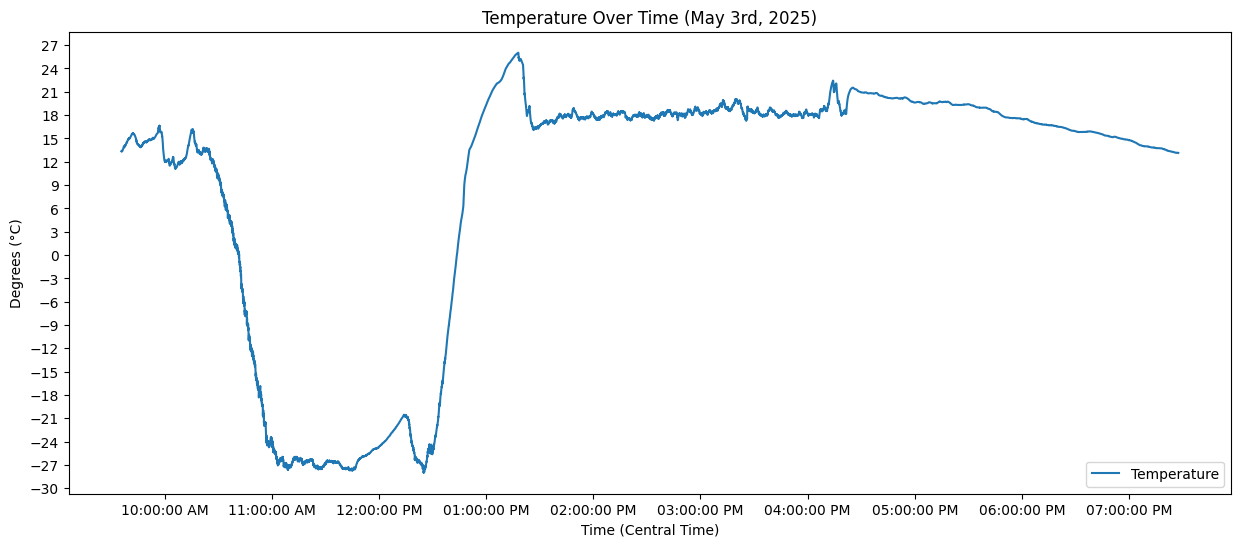

In [55]:
# Plot the temp the data
plt.figure(figsize=(15, 6))
plt.plot(timestamps_naive, temperature, label="Temperature")

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%I:%M:%S %p"))

# Labels and legend
plt.xlabel("Time (Central Time)")
plt.ylabel("Degrees (°C)")
plt.title("Temperature Over Time (May 3rd, 2025)")
plt.legend(loc="lower right")
plt.grid(False)

# Show the plot
plt.show()

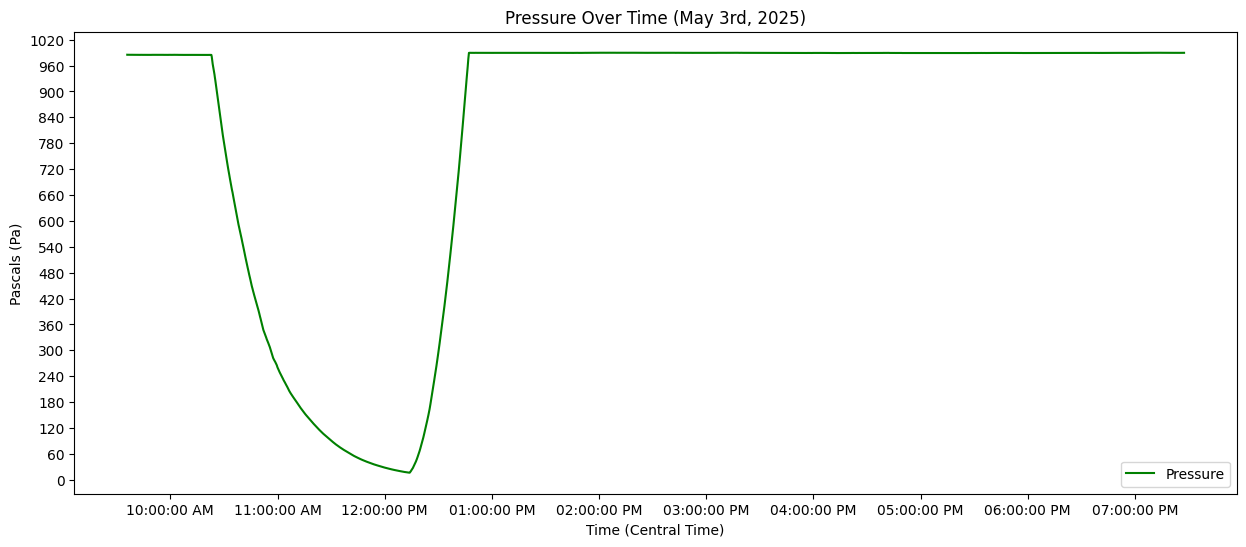

In [54]:
# Plot the Pressure the data
plt.figure(figsize=(15, 6))
plt.plot(timestamps_naive, pressure, label="Pressure", color="green")

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

# Labels and legend
plt.xlabel("Time (Central Time)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%I:%M:%S %p"))
plt.ylabel("Pascals (Pa)")
plt.title("Pressure Over Time (May 3rd, 2025)")
plt.legend(loc="lower right")
plt.grid(False)

# Show the plot
plt.show()

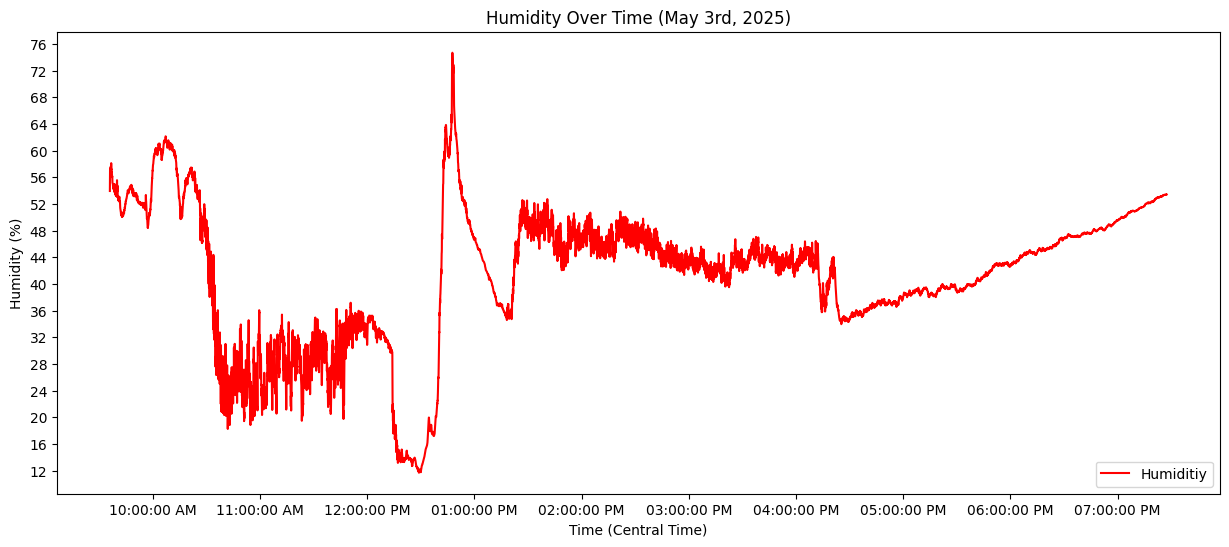

In [53]:
# Plot the Pressure the data
plt.figure(figsize=(15, 6))
plt.plot(timestamps_naive, humidity, label="Humiditiy", color="red")

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

# Labels and legend
plt.xlabel("Time (Central Time)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%I:%M:%S %p"))
plt.ylabel("Humidity (%)")
plt.title("Humidity Over Time (May 3rd, 2025)")
plt.legend(loc="lower right")
plt.grid(False)

# Show the plot
plt.show()